In [23]:
%matplotlib inline
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier, plot_tree
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, precision_recall_curve, auc, f1_score, log_loss, precision_score
from pandas import DataFrame, concat
from numpy.random import seed
from sklearn.feature_selection import SelectKBest, chi2, f_classif
from sklearn.decomposition import PCA
from catboost import CatBoostRegressor
from catboost import Pool
from graphviz import Source
from sklearn.tree import export_graphviz
from sklearn.preprocessing import PolynomialFeatures
import shap
import datetime
import matplotlib.pyplot as plt
from numpy import max
from pandasql import sqldf
from sklearn.metrics import roc_curve
import numpy as np
import pandas as pd
experiment_model = CatBoostRegressor()
df = pd.read_csv("../data/interim/dev.csv")
# df = pd.read_csv("../data/raw/1.csv")


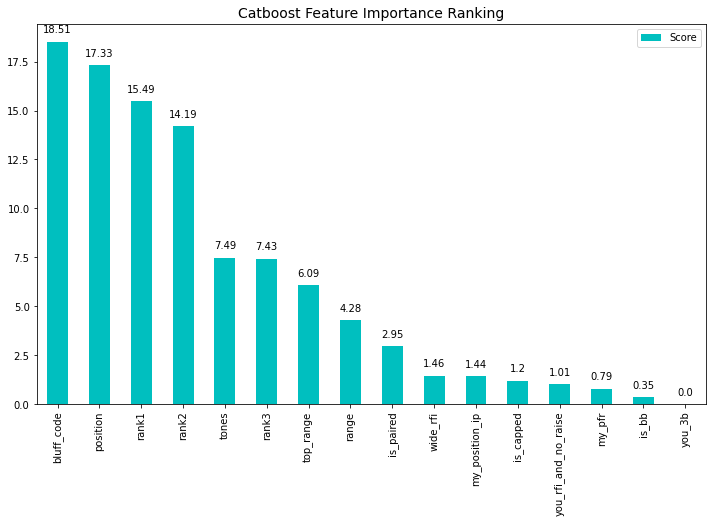

In [24]:
seed(42)
temp_df = df.copy()
# temp_df = temp_df[["bluff_code", "target"]]
# temp_df = df.sample(100000)
# temp_df = df[df["position"] == "BN RFI"]
# X = temp_df.drop(["target", "position"], axis=1)
X = temp_df.drop(["target", "bluff_code2"], axis=1)
y = temp_df[["target"]]


# X = X[important_columns]
cat_features = [6]

# Get shap dataframes
X = DataFrame(X, columns=X.columns)

# Fit the model on the training set
experiment_model.fit(X, y, cat_features=cat_features, logging_level='Silent')

feature_score = pd.DataFrame(list(zip(X.dtypes.index, experiment_model.get_feature_importance(Pool(X, label=y, cat_features=cat_features)))),
                columns=['Feature','Score'])

feature_score = feature_score.sort_values(by='Score', ascending=False, inplace=False, kind='quicksort', na_position='last')

plt.rcParams["figure.figsize"] = (12,7)
ax = feature_score.plot('Feature', 'Score', kind='bar', color='c')
ax.set_title("Catboost Feature Importance Ranking", fontsize = 14)
ax.set_xlabel('')

rects = ax.patches

labels = feature_score['Score'].round(2)

for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 0.35, label, ha='center', va='bottom')

plt.show()


In [25]:
pred_y = experiment_model.predict(X)
from sklearn.metrics import mean_squared_error
score = np.sqrt(mean_squared_error(pred_y, y))
print(score)

1.0114591740694905


## The Important Part

In [26]:
# temp_df = df.sample(2000000)
temp_df = df.copy()

score: 2.3901935021397263
score: 2.1182694607431234
score: 2.1021259527040557
score: 2.1021259527040557
score: 2.1021259527040557
score: 2.1021259527040557
score: 2.1021259527040557


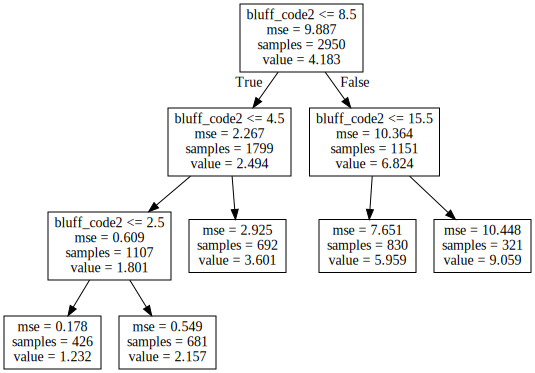

In [27]:
# Get important columns
# importance_threshold = 9
# important_columns = []
# for i, x in zip((feature_score['Score'].round(2) > importance_threshold).index, (feature_score['Score'].round(2) > importance_threshold)):
#     if x:
#         important_columns.append(X.columns[i])
# print("important_columns:", important_columns)


# temp_df_new = temp_df[temp_df["position"] == "Villain LJ RFI and You BB Call"].drop(["position", "range", "top_range"], axis=1) # [["rank1", "my_position_ip", "target"]]
temp_df_new = temp_df.drop(["position"], axis=1)

train, test = train_test_split(temp_df_new, test_size=0.40)


train_X = train.drop(["target"], axis=1)
train_y = train[["target"]]
test_X = test.drop(["target"], axis=1)
test_y = test[["target"]]
min_samples_split = int(train_X.shape[0]*0.3)


from graphviz import Source
from sklearn.tree import export_graphviz
from sklearn import tree, linear_model
%matplotlib inline
for i in range(1,7):
    clf2 = tree.DecisionTreeRegressor(max_depth=i, min_samples_split=min_samples_split)
    clf2.fit(train_X, train_y)
    pred_y = clf2.predict(test_X)
    from sklearn.metrics import mean_squared_error
    score = np.sqrt(mean_squared_error(pred_y, test_y))
    print("score:", score)
    # clf2.coef_

CHOICE = 5

clf2 = tree.DecisionTreeRegressor(max_depth=CHOICE, min_samples_split=min_samples_split)
clf2.fit(train_X, train_y)
pred_y = clf2.predict(train_X)
from sklearn.metrics import mean_squared_error
print("score:", score)
dot_data = export_graphviz(clf2, out_file=None, feature_names=train_X.columns)
graph = Source(dot_data)
graph.render("graph")        
graph
# clf2.coef_    


                                           Plots for rank1                                            
                                           Train data plots                                           



A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


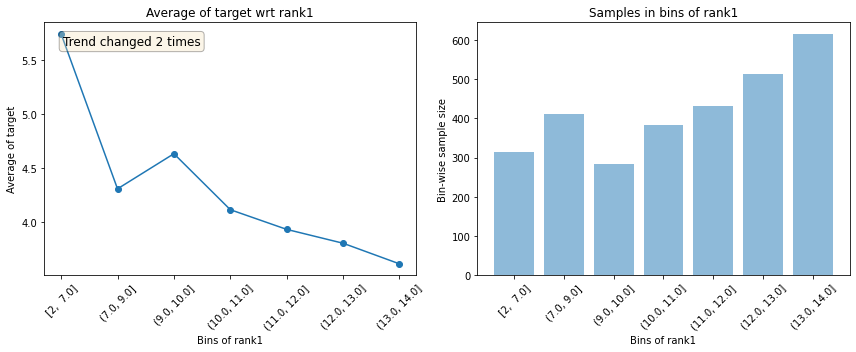

                                           Test data plots                                            


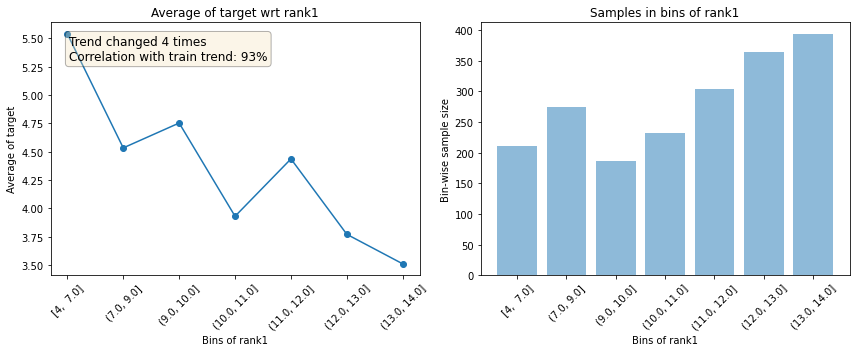

--------------------------------------------------------------------------------------------------------------




In [30]:
from featexp import get_univariate_plots

get_univariate_plots(data=train, target_col='target', data_test=test, features_list=['rank1'])



In [16]:
temp_df['position'].value_counts()

Villain SB RFI and You BB Call       1714
Villain BN RFI and You BB Call       1699
SB RFI                               1691
BN RFI                               1685
HJ RFI                               1664
CO RFI and You BB Call               1664
You RFI, get 3Bet and you Call       1653
LJ RFI                               1639
Villain RFI and You Call (Not BB)    1633
Villain HJ RFI and You BB Call       1632
Villain LJ RFI and You BB Call       1631
CO RFI                               1625
Name: position, dtype: int64

In [ ]:
temp_df_new = temp_df[temp_df["position"] == "LJ RFI"].drop(["position"], axis=1) # [["rank1", "my_position_ip", "target"]]
X_new = temp_df_new.drop(["target"], axis=1)
y = temp_df_new[["target"]]

ys = []
for index, row in test_X.iterrows():
    ys.append(18)
#     if row['rank1'] <= 10 or row['is_paired']:
#         ys.append(17)
#     elif row['rank2'] <= 8:
#         ys.append(18)
#     else:
#         ys.append(19)
        
score = np.sqrt(mean_squared_error(ys, test_y))
print("score:", score)


In [ ]:
# HJ RFI
ys = []
for index, row in X_new.iterrows():
    if row['rank1'] <= 10 and rank2 <= :
        if row['rank2'] <= 8:
            ys.append(18)
        else:
            ys.append(19)
    else:
        ys.append(17)
score = np.sqrt(mean_squared_error(ys, y))
print("score:", score)


Full rules:
- Call:
    - IP:
        - A-K board: 15   (1%)
        - else: 17    (1%)
    - OOP:
        - A-Q board: 8    (13%)
        - else: 10     (11%)
- PFR:
    - IP:
        - CO/BN: 17     (14%)
        - else: 3        (6%)
    - OOP:
        - CO_BN_SB: 8     (7%)        
        - else: 17      (46%)
           
                                
## Simple rules:

- Called: 10
- Late IP: 17
- Other IP: 3
- Late OOP: 8
- Else: 17




In [115]:
for i, name in zip(range(len(X_new.columns)), X_new.columns):
    print(i, name)




0 is_bb
1 is_capped
2 is_paired
3 my_pfr
4 my_position_ip
5 range
6 rank1
7 rank2
8 rank3
9 tones
10 top_range
11 wide_rfi
12 you_3b
13 you_rfi_and_no_raise


In [ ]:
# from sklearn.tree import _tree

# def tree_to_code(tree, train_X):
#     lookup = {}
#     unique, value = np.unique(clf2.apply(train_X), return_counts=True)
#     for (x, y) in zip(unique, value):
#         lookup[x] = y
    
#     feature_names = train_X.columns
    
#     tree_ = tree.tree_
#     feature_name = [
#         feature_names[i] if i != _tree.TREE_UNDEFINED else "undefined!"
#         for i in tree_.feature
#     ]
#     print("def tree({}):".format(", ".join(feature_names)))

#     def recurse(node, depth):
#         indent = "  " * depth
#         if tree_.feature[node] != _tree.TREE_UNDEFINED:
#             name = feature_name[node]
#             threshold = tree_.threshold[node]
#             print("{}if {} <= {}:".format(indent, name, threshold))
#             recurse(tree_.children_left[node], depth + 1)
#             print("{}else:  # if {} > {}".format(indent, name, threshold))
#             recurse(tree_.children_right[node], depth + 1)
#         else:
#             print("{}return {}".format(indent, tree_.value[node]))

#     recurse(0, 1)
    
# tree_to_code(clf2, train_X)  
    
# def extract_from_tree_size_1(dot_data, total_samples):
#     significant_size = total_samples*0.1
#     rule1 = remove_everything(dot_data.split(";")[1].split("\\n")[0])
#     samples1 = int(remove_everything(dot_data.split(";")[1].split("\\n")[2]))
#     value1 = round(float(remove_everything(dot_data.split(";")[1].split("\\n")[3])))
#     print(rule1, samples1, value1)

#     samples2 = int(remove_everything(dot_data.split(";")[2].split("\\n")[1]))
#     value2 = round(float(remove_everything(dot_data.split(";")[2].split("\\n")[2])))
#     if samples2 >= significant_size:
#         print(samples2, value2)

#     samples3 = int(remove_everything(dot_data.split(";")[4].split("\\n")[1]))
#     value3 = round(float(remove_everything(dot_data.split(";")[4].split("\\n")[2])))
#     if samples3 >= significant_size:
#         print(samples3, value3)
        
#     if samples2 >= significant_size:
        
    
